In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline

### Read train and test data

In [35]:
df_train = pd.read_csv("../data/train_new.csv")
print('Number of train records: {}'.format(len(df_train)))
df_train.head()

Number of train records: 60000


,rent_approval_date,town_0,town_1,town_2,town_3,town_4,block,street_name,flat_model,floor_area_sqm,...,flat_type_3-room,flat_type_4-room,flat_type_executive,flat_type_5-room,flat_type_2-room,central region,east region,north region,north-east region,west region
0,0.038835,0,0,0,0,1,2461.419769,2334.161163,2,67.0,...,1,0,0,0,0,0,0,0,0,1
1,0.504854,0,0,0,1,0,2371.483467,2341.480947,2,92.0,...,0,1,0,0,0,0,1,0,0,0
2,0.529126,0,0,0,1,1,2465.059892,2429.073831,7,67.0,...,1,0,0,0,0,1,0,0,0,0
3,0.033981,0,0,1,0,0,2419.540115,2635.040637,9,149.0,...,0,0,1,0,0,0,1,0,0,0
4,0.533981,0,0,1,0,1,2479.255239,2173.943626,7,68.0,...,1,0,0,0,0,1,0,0,0,0


In [36]:
df_test = pd.read_csv("../data/test_new.csv")
print('Number of test records: {}'.format(len(df_test)))
df_test.head()

Number of test records: 30000


,rent_approval_date,town_0,town_1,town_2,town_3,town_4,block,street_name,flat_model,floor_area_sqm,...,flat_type_3-room,flat_type_4-room,flat_type_executive,flat_type_5-room,flat_type_2-room,central region,east region,north region,north-east region,west region
0,0.970874,1,0,1,1,1,2624.520690,2379.499974,7,121.0,...,0,0,0,1,0,0,0,0,1,0
1,0.524272,0,1,1,1,0,2524.058532,2615.882473,6,100.0,...,0,1,0,0,0,0,0,1,0,0
2,1.000000,0,1,1,0,0,2696.577167,2567.505982,2,91.0,...,0,1,0,0,0,0,0,0,0,1
3,0.033981,0,0,0,0,1,2515.834726,2821.948226,6,74.0,...,1,0,0,0,0,0,0,0,0,1
4,0.495146,0,0,0,0,1,2609.989756,2282.274343,7,121.0,...,0,0,0,1,0,0,0,0,0,1


In [37]:
cols = ['rent_approval_date', 
        'town_0', 'town_1', 'town_2', 'town_3', 'town_4', #for binary encoding
#         'town', #for target encoding 
       'flat_model', 
       #'floor_area_sqm', 
       'lease_commence_date',
       #'avg_stock_price', 
        'num_shopping_malls', 
        'min_distance',
       'avg_coe_price', 
        'num_primary_schools', 
       'min_distance_planned',
       'flat_type_3-room', 'flat_type_4-room', 'flat_type_executive', 'flat_type_5-room', 'flat_type_2-room',
       'central region', 'east region', 'north region', 'north-east region', 'west region',
       'subzone', 
        'latitude', 'longitude', 
       # 'furnished', 'elevation',
        'planning_area_0' ,'planning_area_1' ,'planning_area_2' ,'planning_area_3' , 'planning_area_4', 
       # 'street_name', 
        'block'
       ]

y_train = df_train['monthly_rent'].values
X_train = df_train[cols].values

X_test = df_test[cols].values

### Default KNN

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)

In [40]:
scores = cross_val_score(knn_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('tuned random forestMAE: %.3f (%.3f)' % (np.mean(-scores), np.std(scores)))

tuned random forestMAE: 450.667 (4.754)


In [9]:
y_pred = [int(x) for x in y_pred] 
print(len(y_pred))
print(y_pred[:5])

30000
[3080, 2700, 3880, 2190, 2680]


### Choice of k

In [11]:
k_vals = [i for i in range(1, 100)]
knn_mae = []
for k in k_vals:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
    knn_mae.append(np.mean(-scores))

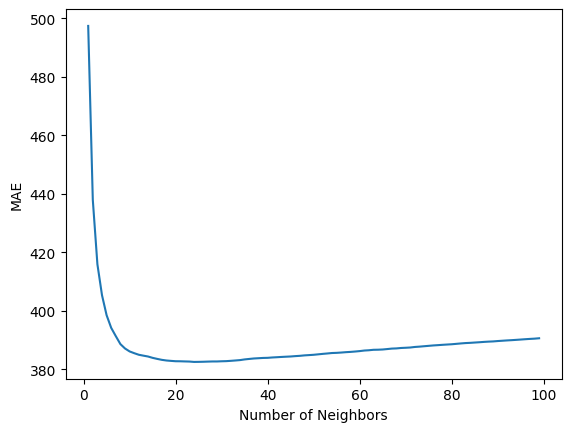

In [14]:
plt.plot(k_vals,knn_mae)

plt.ylabel('MAE')
plt.xlabel('Number of Neighbors')
plt.show()

In [15]:
min(knn_mae)

382.5290625

In [13]:
knn_mae.index(min(knn_mae))

23

In [42]:
k_vals[23]

24

In [23]:
knn_regressor = KNeighborsRegressor(n_neighbors=23)
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)

In [24]:
df = pd.DataFrame(y_pred, columns =['Predicted'], dtype = float)
df.to_csv("../data/knn_output_k23.csv", index_label='Id')

### PCA experiments

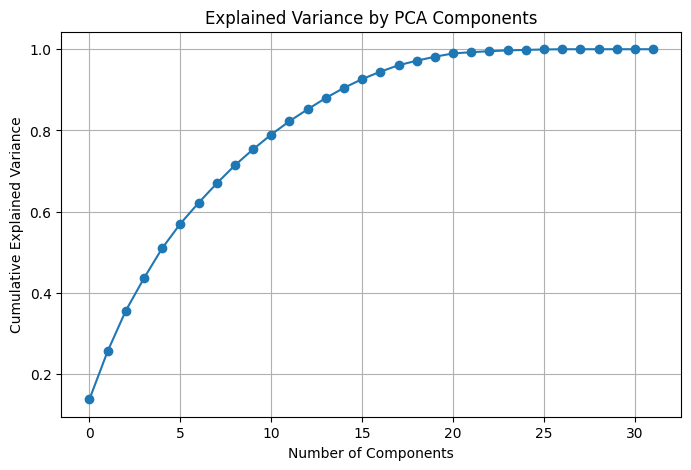

In [17]:
pca = PCA().fit(X_train_scaled)

# Calculate the cumulative sum of explained variance ratio
cumulative_var_ratio = pca.explained_variance_ratio_.cumsum()

# Plotting the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_var_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [32]:
knn_model_with_pca = make_pipeline(StandardScaler(),
                                   PCA(n_components=0.7),
                                   KNeighborsRegressor(n_neighbors=23))

In [33]:
scores = cross_val_score(knn_model_with_pca, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('KNN MAE: %.3f (%.3f)' % (np.mean(-scores), np.std(scores)))

KNN MAE: 381.501 (3.639)
